# PROJET RETROGRADATION DE MARS

## I. Introduction

Dans ce mini-projet, nous allons étudier le mouvement apparent de "rétrogradation" vu depuis le ciel terrestre, de la planète Mars.
En effet, cette dernière semble faire demi-tour puis reprend son chemin formant une boucle dans notre ciel tous les deux ans.
Pour comprendre l'origine de ce phénomène, nous allons modéliser les mouvements respectifs de la planète Terre ainsi que de Mars dans le référentiel héliocentrique.

## II. Modélisation

In [10]:
#Première chose à faire sur un code Python: les imports des modules.

#Le module math sert à faire des calculs ou à utiliser des outils mathématiques spécifiques
import math as m
#Le module pyplot sert à tracer des graphes
import matplotlib.pyplot as plt
#Le module numpy sert à manipuler des tableaux Numpy (vecteurs)
import numpy as np

### a) On modélise les trajectoires de la Terre et de Mars par des trajectoires circulaires
 
$$X = R \cos(\theta)$$ 
$$Y = R \sin(\theta)$$

In [11]:
#on définit les positions selon l'axe X et l'axe Y des planètes
def pos_X(R, theta):
    """Equation d'un cercle des coordonnées polaires vers cartésiennes:
    prend en argument le rayon du cercle et l'angle et renvoie la coordonnée x"""
    return R*np.cos(theta)

def pos_Y(R, theta):
    """même principe: renvoie la coordonnée y"""
    return R*np.sin(theta)

### b) On définit les paramètres physiques adaptés au problème

In [28]:
#données physiques du problème

une_ua = 150e+6 #en km
dist_Terre_Soleil = 1 * une_ua
dist_Mars_Soleil = 1.52371 * une_ua

T_Terre = 365.256 #en jours
T_Mars = 686.885 #en jours

vitesse_angulaire_Terre = 2*m.pi/ 365.256 #angle parcouru en une journée
vitesse_angulaire_Mars = 2*m.pi/ 686.885 
phi_a_l_origine = 240.5/360 *2*m.pi  #angle à l'origine des temps (25 mai 2016)


decalage_temporel = -182 #en jours. Comme on fixe l'origine des temps au 25 mai 2016, lorsque la Terre, le Soleil et Mars sont alignés,
                        #cet origine correspond au centre de la "boucle" de rétrogradation. Pour bien la voir sur les schémas affichés plus tard
                        #on effectue un décalage des axes d'une demi-année
    
dt_un_an = np.arange(decalage_temporel, 365+decalage_temporel)
            #tableau numpy représentant une année

On modélise les positions successives.

In [83]:
#position successives de la Terre et de Mars, à partir d'un instant t où l'angle à l'origine vaut 'phi_a_l_origine'
X_Terre = np.array(pos_X(dist_Terre_Soleil, vitesse_angulaire_Terre*dt_un_an+phi_a_l_origine))
Y_Terre = np.array(pos_Y(dist_Terre_Soleil, vitesse_angulaire_Terre*dt_un_an+phi_a_l_origine))

X_Mars = np.array(pos_X(dist_Mars_Soleil, vitesse_angulaire_Mars*dt_un_an+phi_a_l_origine))
Y_Mars = np.array(pos_Y(dist_Mars_Soleil, vitesse_angulaire_Mars*dt_un_an+phi_a_l_origine))

### c) On trace les graphiques illustrant les trajectoires

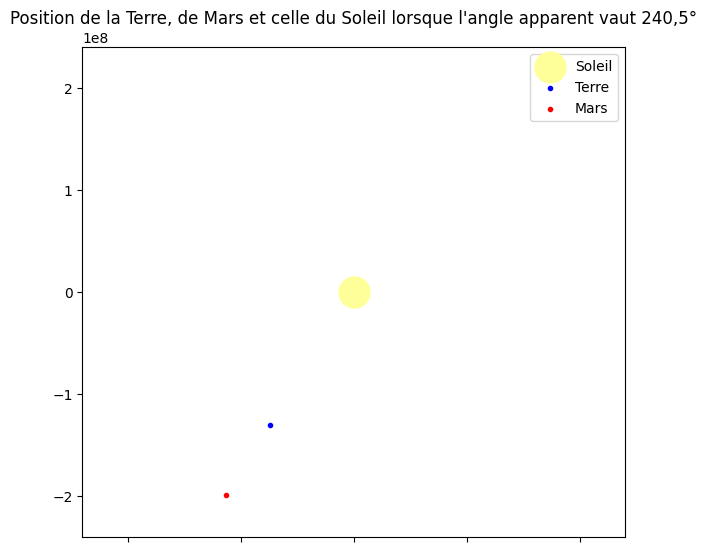

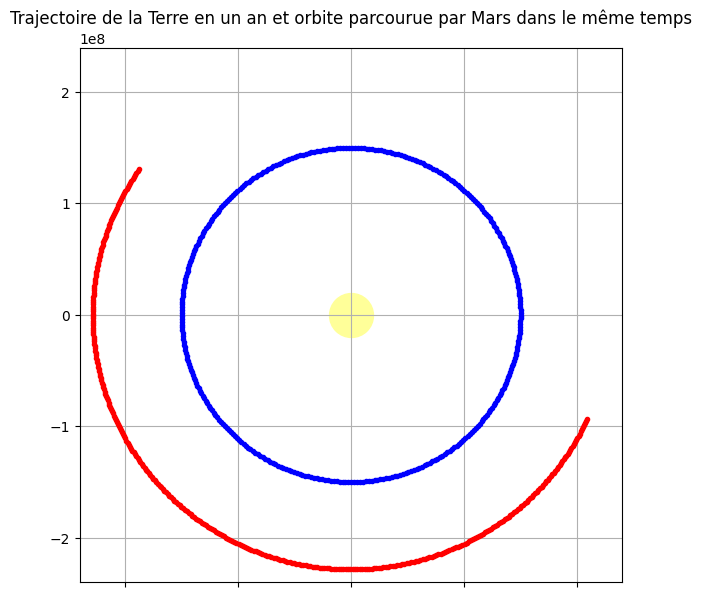

In [109]:
plt.figure(figsize=(7, 14)) #définit la taille de la figure
plt.subplot(2, 1, 1) #permet d'agencer les 2 figures entres elles
plt.scatter(0, 0, s=500, color = '#FFFF99', marker = "o",  label = 'Soleil') #dessine ponctuellement le Soleil
plt.scatter(X_Terre[182], Y_Terre[182], color = 'b', marker = '.', label = 'Terre')
plt.scatter(X_Mars[182], Y_Mars[182], color = 'r', marker = '.', label = 'Mars')
plt.xlim(-dist_Mars_Soleil*1.05, dist_Mars_Soleil*1.05) #force les limites de l'axe x à être légèrement supérieures à la distance Mars-Soleil
plt.ylim(-dist_Mars_Soleil*1.05, dist_Mars_Soleil*1.05)
plt.tick_params(axis = 'x', labelbottom = False) #supprime l'axe des x pour plus de lisibilité
plt.legend() #affiche la légende
plt.title("Position de la Terre, de Mars et celle du Soleil lorsque l'angle apparent vaut 240,5°")

plt.figure(figsize=(7, 14))
plt.subplot(2, 1, 2)
plt.scatter(0, 0, s=1000, color = '#FFFF99', marker = "o", label = 'Soleil')
plt.plot(X_Terre, Y_Terre, color = 'b', marker = '.',  label = 'Terre')
plt.plot(X_Mars, Y_Mars, color = 'r', marker = '.',  label = 'Mars')
plt.xlim(-dist_Mars_Soleil*1.05, dist_Mars_Soleil*1.05)
plt.ylim(-dist_Mars_Soleil*1.05, dist_Mars_Soleil*1.05)
plt.tick_params(axis = 'x', labelbottom = False)
plt.grid()
plt.title("Trajectoire de la Terre en un an et orbite parcourue par Mars dans le même temps")

plt.subplots_adjust(top=0.95) #ajuste l'espace entre les deux figures
plt.show() #affiche la figure

In [101]:
#on définit l'angle longitudinal de Mars (phi_apparent) par l'arctangente de ses coordonnées dans le référentiel géocentrique
def phi_apparent(pos_X_Terre, pos_Y_Terre, pos_X_Mars, pos_Y_Mars):
    return np.arctan2(pos_Y_Mars - pos_Y_Terre, pos_X_Mars - pos_X_Terre)

phi_apparent = np.array(phi_apparent(X_Terre, Y_Terre, X_Mars, Y_Mars)/m.pi*180)

Text(0, 0.5, 'angle apparent de Mars  [degrés]')

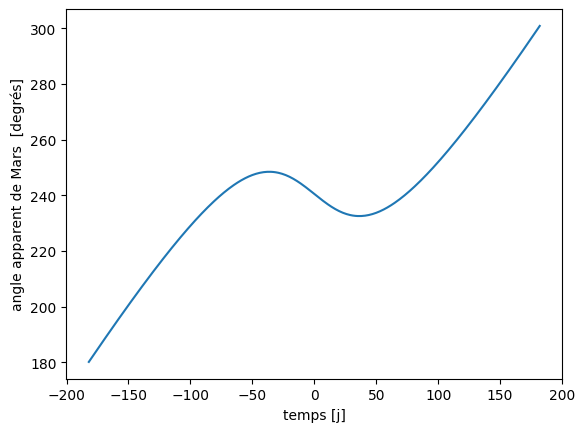

In [102]:
#on affiche l'angle obtenu par le modèle en fonction du temps. On relarque bien qu'autour de t = 0j, l'angle diminue puis réaugmente.
plt.plot(dt_un_an, phi_apparent+np.ones(phi_apparent.shape)*360)
plt.xlabel('temps [j]')
plt.ylabel('angle apparent de Mars  [degrés]') 

## III. Comparaison avec les données

In [114]:
#on lit le fichier de données avec Pandas
import pandas as pd
Data_Mars = pd.read_csv("DataMars.csv", comment = '#')

In [115]:
#on sort les données qui nous intéressent: l'angle longitudinal ainsi que la date
angle_exp =  Data_Mars['Longitude (decimal)']
date = Data_Mars['Date']
date = pd.DatetimeIndex(date)

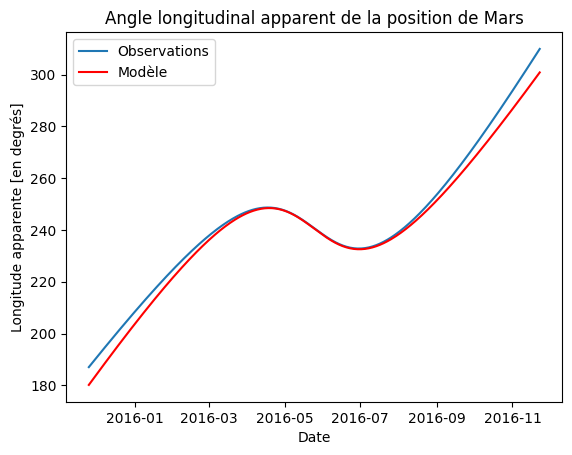

In [111]:
#on affiche l'angle théorique ainsi que le vrai, avec la date translatée de façon à avoir t = 0 <-> 25 Mai 2016
plt.plot(date[451+decalage_temporel:451+365+decalage_temporel], angle_exp[451+decalage_temporel:451+365+decalage_temporel], label = 'Observations')
plt.plot(date[451+decalage_temporel:451+365+decalage_temporel], phi_apparent+np.ones(phi_apparent.shape)*360, color = 'r', label = 'Modèle' )
plt.ylabel('Longitude apparente [en degrés]', )
plt.xlabel('Date')
plt.title('Angle longitudinal apparent de la position de Mars')
plt.legend()

## IV. Conclusions

A partir du problème physique que l'on souhaitait étudier, nous avons modélisé les trajectoires de la Terre et de Mars dans le référentiel héliocentrique, puis calculé l'angle longitudinal de Mars dans le référentiel héliocentrique. En ajustant l'échelle de temps, nous avons pu mettre en évidence l'effet de rétrogradation de Mars sur la dernière figure en comparant avec les données réelles. Le modèle semble performant. Nous avons étudier tous les mouvements dans un plan, hypothèse fiable car le Soleil la Terre et Mars appartiennent au plan de l'écliptique.